#### Student Name: Mai Ngo
#### Course Name and Number: CSC 555 Big Data Mining
#### Assignment 4 - Part 1
#### Date: 11/10/2023

### Part 1

select d_dayofweek, d_month, lo_revenue, lo_extendedprice \
from lineorder, dwdate \
where lo_orderdate = d_datekey \
and d_year = 1997 \
and lo_discount between 6 and 8 \
and lo_quantity < 11;

In [1]:
#Sample for simplified code.
lines = ['19920101|January 1, 1992|Thursday|January|1997|199201|Jan1992|5|1|1|1|1|Winter|0|1|1|1|', \
         '19960102|January 2, 1992|Friday|January|1997|199201|Jan1992|6|2|2|1|1|Winter|0|1|0|1|', \
         '19960102|January 3, 1992|Saturday|January|1997|199201|Jan1992|7|3|3|1|1|Winter|1|1|0|0|', \
         '19960102|January 4, 1992|Sunday|January|1997|199201|Jan1992|1|4|4|1|1|Winter|0|1|0|0|', \
         '19960102|January 5, 1992|Monday|January|1997|199201|Jan1992|2|5|5|1|1|Winter|0|1|0|1|', \
         '19960102|January 6, 1992}Tuesday|January|1992|199201|Jan1992|3|6|6|1|1|Winter|0|1|0|1|', \
         '19960102|January 2, 1992|Friday|January|1997|199201|Jan1992|6|2|2|1|1|Winter|0|1|0|1|', \
         '1|1|7381|155190|828|19960102|5-LOW|0|0|2116823|17366547|7|2032150|74711|2|19960212|TRUCK|', \
         '1|2|7381|67310|163|19960102|5-LOW|0|9|4598316|17366547|8|4184467|76638|6|19960228|MAIL|', \
         '1|3|7381|63700|71|19920106|5-LOW|0|8|1330960|17366547|6|1197864|99822|2|19960305|REG AIR|', \
         '1|4|7381|2132|943|19960102|5-LOW|0|7|2895564|17366547|7|2634963|62047|6|19960330|AIR|', \
         '1|5|7381|24027|1625|19960102|5-LOW|12|24|2282448|17366547|10|2054203|57061|4|19960314|FOB|', \
         '1|6|7381|15635|1368|19920102|5-LOW|0|10|4962016|17366547|7|4614674|93037|2|19960207|MAIL|']

In [2]:
#Mapper - Extract column name using index.
#!/usr/bin/python
import sys

#Identify each table by using second to last character.
#Extract required collumn accordingly for each table.
#Apply filtering given query condition. 

for line in sys.stdin:
    columnName = line.strip().split('|') #Since both tables have 17 columns.
    if columnName[-2] == '0' or columnName[-2] == '1': 
        d_dayofweek = columnName[2]
        d_month = columnName[3]
        d_datekey = columnName[0]
        d_year = int(columnName[4])
        if d_year == 1997: 
            print(f"dwdate|{d_datekey}|{d_dayofweek}|{d_month}")
    else:
        lo_revenue = int(columnName[12])
        lo_extendedprice = columnName[9]
        lo_orderdate = columnName[5]
        lo_quantity = int(columnName[8])
        lo_discount = int(columnName[11])
        if lo_quantity < 11 and 6 <= lo_discount <= 8:
            print(f"lineorder|{lo_orderdate}|{lo_revenue}|{lo_extendedprice}")

In [3]:
#Sample for simplified code.
lines2 = ['dwdate|19920101|Thursday|January', \
          'dwdate|19960102|Friday|January', \
          'dwdate|19960102|Saturday|January', \
          'dwdate|19960102|Sunday|January', \
          'dwdate|19960102|Monday|January', \
          'dwdate|19960102|Friday|January', \
          'lineorder|19960102|2032150|2116823', \
          'lineorder|19960102|4184467|4598316', \
          'lineorder|19920106|1197864|1330960', \
          'lineorder|19960102|2634963|2895564', \
          'lineorder|19920102|4614674|4962016']

In [4]:
#Reducer
#!/usr/bin/python
import sys

#Initiate dictionary for dwdate table to cross check.
#Lineorder table as a list.
dwdateDict = {}
lineorderData = []

print('d_dayofweek|d_month|lo_revenue|lo_extendedprice')

for line in sys.stdin:
    columnName = line.strip().split('|')
    fileSource = columnName[0]

    if fileSource == "dwdate":
        d_datekey = columnName[1]
        d_dayofweek = columnName[2]
        d_month = columnName[3]

        if d_datekey not in dwdateDict:
            #dwdate dictionary with d_datekey as key, and (d_dayof week, d_month) as tuple values. 
            dwdateDict[d_datekey] = []
        dwdateDict[d_datekey].append((d_dayofweek, d_month))

    elif fileSource == "lineorder":
        lo_orderdate = columnName[1]
        lo_revenue = columnName[2]
        lo_extendedprice = columnName[3]

        if lo_orderdate in dwdateDict:
            for d_dayofweek, d_month in dwdateDict[lo_orderdate]:
                #List with element as four variable stored as tuples.
                lineorderData.append((d_dayofweek, d_month, lo_revenue, lo_extendedprice))

#Each row from "lineorder" matching with every row from "dwdate".
for variable in lineorderData:
    print(f"{variable[0]}|{variable[1]}|{variable[2]}|{variable[3]}")

d_dayofweek|d_month|lo_revenue|lo_extendedprice


### Part 2

In [5]:
import hashlib
#Class example.
hashlib.sha256(b"tmalik 1").hexdigest()

'68b92c1d493f82404fe793e26601d0771c9c69342da572a10badde9dde1e587d'

In [6]:
#Using my depaul id.
maiHash = hashlib.sha256(b"mngo 1").hexdigest()
print(f'My hash value: {maiHash}')

#First hash function.
firstHash = int(maiHash[0], 16)
print(f'First hash index: {firstHash}')
#Second hash function.
secondHash = int(maiHash[1], 16)
print(f'Second hash index: {secondHash}')

My hash value: 8342551fea44be8bb7684be59aaf80a427d1a3fc005e698d48d6cc4d86cf8e3c
First hash index: 8
Second hash index: 3


#### With this, every input X 'number string' will be hashed using template 'mngo X'.

In [7]:
class BloomFilter:
    def __init__(self, filterSize, hashFunctions, depaulid):
        self.filterSize = filterSize
        self.hashFunctions = hashFunctions
        self.bitArray = [False] * filterSize
        self.depaulid = depaulid

    def add(self, element):
        '''Adding an element to bloom filter.'''
        
        #For each hash function '0' and '1'.
        for i in range(self.hashFunctions):
            #Update hash template 'mngo X', given element number is X.
            elementFinal = f"{self.depaulid} {element}"
            
            #Calling _hash function to get index to set in bit array.
            index = self._hash(elementFinal, i)
            #Set to '1' in bit array at returned index position. 
            self.bitArray[index] = True

    def contains(self, element):
        '''Checking if an element exists in bloom filter.'''
        
        for i in range(self.hashFunctions):
            elementFinal = f"{self.depaulid} {element}"
            index = self._hash(elementFinal, i)
            
            #If bit array value at returned index position is 'False' or '0'.
            if not self.bitArray[index]:
                return False
        return True

    def _hash(self, elementFinal, i):
        '''Hash an element with respective hashing function. 
        Using hashlib.sha256 and return the index to set in bit array.'''
        
        #Get hash value - hexadecimal.
        hashHex = hashlib.sha256(elementFinal.encode('utf-8')).hexdigest()
        #With respective hash function of either '0' and '1'. 
        #Extract first and second hex digits. 
        #Index will be within (0, 15) for hexadecimal numbers. 
        index = int(hashHex[i], 16) 
        
        return index

In [8]:
if __name__ == '__main__':
    #Input my depaulid.
    depaulid = 'mngo'
    #Two hash functions of '0' and '1' represents 1st and 2nd hex digit. 
    hashFunctions = 2
    #Size of bit array.
    filterSize = 16
    bloomFilter = BloomFilter(filterSize, hashFunctions, depaulid)
    
    #Insert elements into the filter.
    insertElement = [str(numStr) for numStr in range(20) if numStr % 2 != 0]
    for element in insertElement:
        bloomFilter.add(element)
        print(f'Element {element} | Bit set: {bloomFilter.bitArray}')

    #Bit have been set after all insertions.
    print('\n')
    print('a) Bit have been set after all insertions:')
    print(bloomFilter.bitArray)
    print('\n')
    print('b) Check element presense:')
    
    #Check for element presence.
    checkElement = [str(numStr) for numStr in range(2, 21) if numStr % 2 == 0]
    for element in checkElement:
        if bloomFilter.contains(element):
            print(f"{element} may be in the set.")
        else:
            print(f"{element} is definitely not in the set.")

Element 1 | Bit set: [False, False, False, True, False, False, False, False, True, False, False, False, False, False, False, False]
Element 3 | Bit set: [False, False, True, True, True, False, False, False, True, False, False, False, False, False, False, False]
Element 5 | Bit set: [False, False, True, True, True, False, False, False, True, True, False, False, False, True, False, False]
Element 7 | Bit set: [False, False, True, True, True, False, False, False, True, True, False, False, True, True, False, True]
Element 9 | Bit set: [False, False, True, True, True, False, False, False, True, True, False, False, True, True, True, True]
Element 11 | Bit set: [False, True, True, True, True, False, False, False, True, True, False, False, True, True, True, True]
Element 13 | Bit set: [False, True, True, True, True, False, False, True, True, True, False, False, True, True, True, True]
Element 15 | Bit set: [False, True, True, True, True, False, False, True, True, True, False, False, True, True

### Part 3

### Method 1: Matrix multiplcation follow class.

In [9]:
import numpy as np

threshold = 0.0000000000001
beta =0.85

#Matrix with '1' represents incoming edges. Column: from | Row: to.
adjacencyMatrix = [[0, 1, 0, 1],
                   [0, 0, 1, 0],
                   [1, 0, 0, 0],
                   [1, 0, 1, 0]]

#Make a copy of adjacency matrix and convert each element into float.
float_adjacencyMatrix=np.array(adjacencyMatrix, dtype=float)

outgoing_edgesCount=[]
#Get count of outgoing edges of each respective neuron.
for i in range(0, len(adjacencyMatrix)):
    outgoing_edgesCount.append(np.sum(float_adjacencyMatrix[:,i]))

print("Number of outgoing edges of each respective neuron node: ", outgoing_edgesCount)   

Number of outgoing edges of each respective neuron node:  [2.0, 1.0, 2.0, 1.0]


In [10]:
#Make a copy of float adjacency matrix to calculate importance of outgoing edges, by column: 'from'.
importance_adjacencyMatrix = float_adjacencyMatrix

for column in range(0, len(adjacencyMatrix)):
    #(M[:,j]) is each column of adjacency matrix.
    importance_adjacencyMatrix[:,column]=importance_adjacencyMatrix[:,column]/outgoing_edgesCount[column]

print("Column stochastic probability matrix / importance distribution of outgoing node:")
print(importance_adjacencyMatrix)

rankVector = (1.0 + np.zeros([len(adjacencyMatrix), 1]))/len(adjacencyMatrix)
print("Initial rank vector:")
print(rankVector)

Column stochastic probability matrix / importance distribution of outgoing node:
[[0.  1.  0.  1. ]
 [0.  0.  0.5 0. ]
 [0.5 0.  0.  0. ]
 [0.5 0.  0.5 0. ]]
Initial rank vector:
[[0.25]
 [0.25]
 [0.25]
 [0.25]]


#### 1001 iterations with convergence included.

In [11]:
#Not apply Random Walk since this is not a 'dead end' or 'spider trap' case.
previous_rankVector=rankVector

for i in range(1, 1001):
    rankVector = np.matmul(importance_adjacencyMatrix, previous_rankVector)
    #Check for convergence.
    difference = np.sum(abs(rankVector - previous_rankVector))
    if (difference < threshold):
        print("Converged iteration: ", i)
        break
    
    previous_rankVector=rankVector

print(f'Final rank vector: {rankVector[:, 0]}')

sortedIndex = np.argsort(rankVector, axis=0)[::-1]
rankedList = [index[0] + 1 for index in sortedIndex]
print(f'Ranking of pages: {rankedList}')

Converged iteration:  86
Final rank vector: [0.4 0.1 0.2 0.3]
Ranking of pages: [1, 4, 3, 2]


#### 6 Iterations, follow manual calculation.

In [12]:
rankVector = (1.0 + np.zeros([len(adjacencyMatrix), 1]))/len(adjacencyMatrix)
previous_rankVector=rankVector

for i in range(1, 7):
    rankVector = np.matmul(importance_adjacencyMatrix, previous_rankVector)
    #Check for convergence.
    difference = np.sum(abs(rankVector - previous_rankVector))
    if (difference < threshold):
        print("Converged iteration: ", i)
        break
    
    previous_rankVector=rankVector

print(f'Final rank vector: {rankVector[:, 0]}')

sortedIndex = np.argsort(rankVector, axis=0)[::-1]
rankedList = [index[0] + 1 for index in sortedIndex]
print(f'Ranking of pages: {rankedList}')

Final rank vector: [0.40625  0.109375 0.1875   0.296875]
Ranking of pages: [1, 4, 3, 2]


### Method 2: Using NetworkX library.

In [13]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import sys

#Generate given network.
M = nx.DiGraph()
M.add_nodes_from(['A', 'B', 'X', 'Y'])
M.add_edges_from([('B', 'A'), ('A', 'Y'), ('Y', 'A'), ('X', 'Y'), ('X', 'B'), ('A', 'X')])

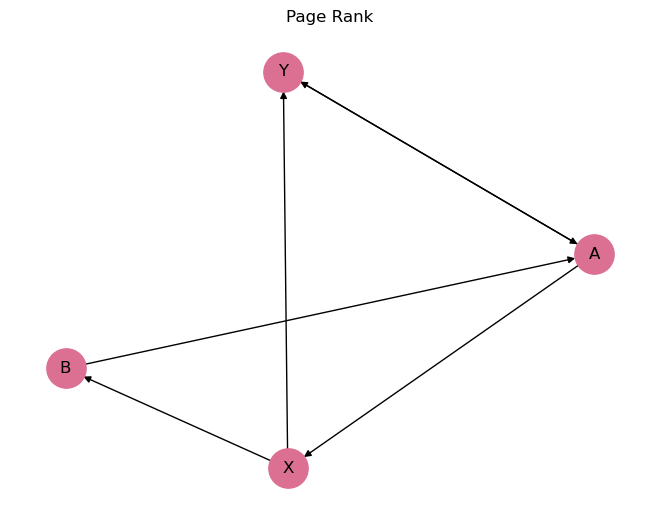

In [14]:
#Plot the network.
pos = nx.spring_layout(M) 
nx.draw(M, pos, with_labels=True, node_size=800, node_color='palevioletred')
plt.title("Page Rank")
plt.show()

In [15]:
def pageRank(network, iterations):
    '''Page rank calculation.'''
    
    #Set initial importance value for each node, per class example.
    initialImportance = 1.0 / len(network)
    pagerankDict = {node: initialImportance for node in network.nodes()}

    for _ in range(iterations):
        #Dictionary to store new page rank after each iteration.
        updated_pageRank = {}

        for node in network.nodes():
            sum_pageRank = 0
            for neighbor in network.predecessors(node):
                #Formula following class, importance of iterated  node = sum of importances of incoming edges.
                #Which EACH importance of outgoing edges proportioned to how many outgoing edges in respective node.   
                sum_pageRank += pagerankDict[neighbor] / len(network.out_edges(neighbor))
            updated_pageRank[node] = sum_pageRank

        #Check for convergence, compared to previous page rank. Using threshold given in class.
        if sum(abs(updated_pageRank[node] - pagerankDict[node]) for node in network) < 0.0000000000001:
            print(f'Stop at iteration: {_}')
            break

        pagerankDict = updated_pageRank

    #Rank the nodes based on final importance values.
    sortedNodes = sorted(pagerankDict, key=pagerankDict.get, reverse=True)
    ranked_pageRank = {node: rank + 1 for rank, node in enumerate(sortedNodes)}

    for node in network.nodes():
        print(f"Node {node}: PageRank = {pagerankDict[node]:.5f}, Rank = {ranked_pageRank[node]}")

#### 100 Iterations, allow room for convergence check.

In [16]:
pageRank(M, 100) 

Stop at iteration: 85
Node A: PageRank = 0.40000, Rank = 1
Node B: PageRank = 0.10000, Rank = 4
Node X: PageRank = 0.20000, Rank = 3
Node Y: PageRank = 0.30000, Rank = 2


#### 6 Iterations, follow manual calculation.

In [17]:
pageRank(M, 6)

Node A: PageRank = 0.40625, Rank = 1
Node B: PageRank = 0.10938, Rank = 4
Node X: PageRank = 0.18750, Rank = 3
Node Y: PageRank = 0.29688, Rank = 2


### Part 4 - 1st approach using Random Walk, teleport randomly to other nodes. 

### Method 1: Matrix multiplcation follow class.

In [18]:
#Matrix with '1' represents incoming edges. Column: from | Row: to.
adjacencyMatrix = [[0, 0, 1, 1, 0],
                   [0, 0, 1, 1, 0],
                   [0, 0, 0, 1, 0],
                   [1, 0, 0, 0, 0],
                   [0, 1, 0, 0, 0]]
#Make a copy of adjacency matrix and convert each element into float.
float_adjacencyMatrix=np.array(adjacencyMatrix, dtype=float)

outgoing_edgesCount=[]
#Get count of outgoing edges of each respective neuron.
for i in range(0, len(adjacencyMatrix)):
    outgoing_edgesCount.append(np.sum(float_adjacencyMatrix[:,i]))

print("Number of outgoing edges of each respective neuron node: ", outgoing_edgesCount) 

Number of outgoing edges of each respective neuron node:  [1.0, 1.0, 2.0, 3.0, 0.0]


In [19]:
#Make a copy of float adjacency matrix to calculate importance of outgoing edges, by column: 'from'.
importance_adjacencyMatrix = float_adjacencyMatrix

for column in range(0, len(adjacencyMatrix)):
    #(M[:,j]) is each column of adjacency matrix.
    #Tackle dead end, assign importance value of outgoing edges to ensure sum col = 1
    if np.all(np.isclose(importance_adjacencyMatrix[:, column], 0)):
        importance_adjacencyMatrix[:, column] = 1.0 / len(adjacencyMatrix)
    else:
        importance_adjacencyMatrix[:,column]=importance_adjacencyMatrix[:,column]/outgoing_edgesCount[column]

print("Column stochastic probability matrix / importance distribution of outgoing node:")
print(importance_adjacencyMatrix)

rankVector = (1.0 + np.zeros([len(adjacencyMatrix), 1]))/len(adjacencyMatrix)
print("Initial rank vector:")
print(rankVector)

Column stochastic probability matrix / importance distribution of outgoing node:
[[0.         0.         0.5        0.33333333 0.2       ]
 [0.         0.         0.5        0.33333333 0.2       ]
 [0.         0.         0.         0.33333333 0.2       ]
 [1.         0.         0.         0.         0.2       ]
 [0.         1.         0.         0.         0.2       ]]
Initial rank vector:
[[0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]]


#### 1001 iterations with convergence included.

In [20]:
previous_rankVector=rankVector
#Remove, only applicable for spider trap.
#uniformR = (1.0-beta)*rankVector

for i in range(1, 1001):
    rankVector = np.matmul(float_adjacencyMatrix, previous_rankVector)
    #Check for convergence.
    difference = np.sum(abs(rankVector - previous_rankVector))
    if (difference < threshold):
        print("Converged iteration: ", i)
        break
    
    previous_rankVector=rankVector

print(f"Final rank vector: {rankVector[:, 0]}")

#Get ranking special case, TWO duplicate importance value.
rankList = []
for value in rankVector:
    rankList.append(tuple(value))

sorted_rankList = sorted(rankList, reverse=True)

ranks = np.empty_like(rankVector)
valueSet = set()

for i, value in enumerate(rankVector):
    tupleValue = tuple(value)
    if tupleValue not in valueSet:
        #If new importance value, ranking as 'index + 1' from sorted list. 
        valueSet.add(tupleValue)
        rankIndex = sorted_rankList.index(tupleValue)
        ranks[i] = rankIndex + 1
    else:
        #If importance value already exists, ranking as 'index + 2' from sorted list.
        #Given 'index' is from the first occurence of importance value.  
        ranks[i] = sorted_rankList.index(tupleValue) + 2

finalRanking = [int(rank) for rank in ranks]
ranks = ranks.reshape(rankVector.shape)

print(f"Ranking of pages: {finalRanking}")

Converged iteration:  45
Final rank vector: [0.19354839 0.19354839 0.12903226 0.24193548 0.24193548]
Ranking of pages: [3, 4, 5, 1, 2]


#### 6 Iterations, follow manual calculation.

In [21]:
rankVector = (1.0 + np.zeros([len(adjacencyMatrix), 1]))/len(adjacencyMatrix)
previous_rankVector = rankVector

for i in range(1, 7):
    rankVector = np.matmul(float_adjacencyMatrix, previous_rankVector)
    #Check for convergence.
    difference = np.sum(abs(rankVector - previous_rankVector))
    if (difference < threshold):
        print("Converged iteration: ", i)
        break
    
    previous_rankVector=rankVector

print(f"Final rank vector: {rankVector[:, 0]}")

#Get ranking special case, TWO duplicate importance value.
rankList = []
for value in rankVector:
    rankList.append(tuple(value))

sorted_rankList = sorted(rankList, reverse=True)

ranks = np.empty_like(rankVector)
valueSet = set()

for i, value in enumerate(rankVector):
    tupleValue = tuple(value)
    if tupleValue not in valueSet:
        #If new importance value, ranking as 'index + 1' from sorted list. 
        valueSet.add(tupleValue)
        rankIndex = sorted_rankList.index(tupleValue)
        ranks[i] = rankIndex + 1
    else:
        #If importance value already exists, ranking as 'index + 2' from sorted list.
        #Given 'index' is from the first occurence of importance value.  
        ranks[i] = sorted_rankList.index(tupleValue) + 2

finalRanking = [int(rank) for rank in ranks]
ranks = ranks.reshape(rankVector.shape)
print(f"Ranking of pages: {finalRanking}")

Final rank vector: [0.1942291  0.1942291  0.12855561 0.2414931  0.2414931 ]
Ranking of pages: [3, 4, 5, 1, 2]


### Method 2: Using NetworkX library.

In [22]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import sys

#Generate given network.
L = nx.DiGraph()
L.add_nodes_from(['A', 'Q', 'X', 'Y', 'Z'])
L.add_edges_from([('A', 'Y'), ('Y', 'A'), ('X', 'A'), ('Y', 'X'), ('Y', 'Q'), ('X', 'Q'), ('Q', 'Z')])

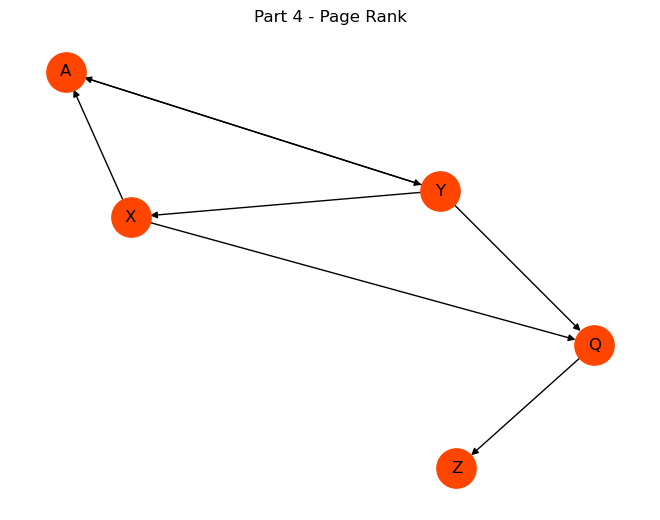

In [23]:
#Plot the network.
pos = nx.spring_layout(L) 
nx.draw(L, pos, with_labels=True, node_size=800, node_color='orangered')
plt.title("Part 4 - Page Rank")
plt.show()

#### 10001 Iterations, allow room for convergence check.

In [24]:
pageRank(L, 10001) 

Stop at iteration: 98
Node A: PageRank = 0.00000, Rank = 3
Node Q: PageRank = 0.00000, Rank = 4
Node X: PageRank = 0.00000, Rank = 5
Node Y: PageRank = 0.00000, Rank = 1
Node Z: PageRank = 0.00000, Rank = 2


#### 6 Iterations, follow manual calculation.

In [25]:
pageRank(L, 6) 

Node A: PageRank = 0.03519, Rank = 3
Node Q: PageRank = 0.03519, Rank = 4
Node X: PageRank = 0.02037, Rank = 5
Node Y: PageRank = 0.04630, Rank = 1
Node Z: PageRank = 0.04630, Rank = 2


### Part 4 - 2nd approach removing dead ends. Page rank for three nodes: A, X and Y.

In [26]:
#Matrix with '1' represents incoming edges. Column: from | Row: to.
adjacencyMatrix = [[0, 1, 1],
                   [0, 0, 1],
                   [1, 0, 0]]

#Make a copy of adjacency matrix and convert each element into float.
float_adjacencyMatrix=np.array(adjacencyMatrix, dtype=float)

outgoing_edgesCount=[]
#Get count of outgoing edges of each respective neuron.
for i in range(0, len(adjacencyMatrix)):
    outgoing_edgesCount.append(np.sum(float_adjacencyMatrix[:,i]))

print("Number of outgoing edges of each respective neuron node: ", outgoing_edgesCount)   

Number of outgoing edges of each respective neuron node:  [1.0, 1.0, 2.0]


In [27]:
#Make a copy of float adjacency matrix to calculate importance of outgoing edges, by column: 'from'.
importance_adjacencyMatrix = float_adjacencyMatrix

for column in range(0, len(adjacencyMatrix)):
    #(M[:,j]) is each column of adjacency matrix.
    importance_adjacencyMatrix[:,column]=importance_adjacencyMatrix[:,column]/outgoing_edgesCount[column]

print("Column stochastic probability matrix / importance distribution of outgoing node:")
print(importance_adjacencyMatrix)

rankVector = (1.0 + np.zeros([len(adjacencyMatrix), 1]))/len(adjacencyMatrix)
print("Initial rank vector:")
print(rankVector)

Column stochastic probability matrix / importance distribution of outgoing node:
[[0.  1.  0.5]
 [0.  0.  0.5]
 [1.  0.  0. ]]
Initial rank vector:
[[0.33333333]
 [0.33333333]
 [0.33333333]]


#### 1001 iterations with convergence included.

In [28]:
#Not apply Random Walk since this is not a 'dead end' or 'spider trap' case.
previous_rankVector=rankVector

for i in range(1, 1001):
    rankVector = np.matmul(importance_adjacencyMatrix, previous_rankVector)
    #Check for convergence.
    difference = np.sum(abs(rankVector - previous_rankVector))
    if (difference < threshold):
        print("Converged iteration: ", i)
        break
    
    previous_rankVector=rankVector

print(f'Final rank vector: {rankVector[:, 0]}')

sortedIndex = np.argsort(rankVector, axis=0)[::-1]
rankedList = [index[0] + 1 for index in sortedIndex]
print(f'Ranking of pages: {rankedList}')

Converged iteration:  85
Final rank vector: [0.4 0.2 0.4]
Ranking of pages: [3, 1, 2]


#### 6 Iterations, follow manual calculation.

In [29]:
#Not apply Random Walk since this is not a 'dead end' or 'spider trap' case.
rankVector = (1.0 + np.zeros([len(adjacencyMatrix), 1]))/len(adjacencyMatrix)
previous_rankVector=rankVector

for i in range(1, 7):
    rankVector = np.matmul(importance_adjacencyMatrix, previous_rankVector)
    #Check for convergence.
    difference = np.sum(abs(rankVector - previous_rankVector))
    if (difference < threshold):
        print("Converged iteration: ", i)
        break
    
    previous_rankVector=rankVector

print(f'Final rank vector: {rankVector[:, 0]}')

sortedIndex = np.argsort(rankVector, axis=0)[::-1]
rankedList = [index[0] + 1 for index in sortedIndex]
print(f'Ranking of pages: {rankedList}')

Final rank vector: [0.41666667 0.20833333 0.375     ]
Ranking of pages: [1, 3, 2]
